In [52]:
import numpy as np
import os
import matplotlib.pyplot as plt

import kepdump

from pygrids.grids import grid_strings

## Plot defaults

In [82]:
def default_fig(xlim=None, ylim=None, xlog=True, ylog=True, ylabel='', xlabel='',
                figsize=[16, 8], fontsize=16):
    """Return plt Figure with some default settings
    """
    islog = {True: 'log', False: 'linear'}
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.set_xscale(islog[xlog])
    ax.set_yscale(islog[ylog])
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    ax.tick_params(labelsize=fontsize)
    
    return fig, ax
    
    
    

Using matplotlib backend: Qt5Agg


## Load kepler dumpfile

In [130]:
path = '/home/zacpetej/archive/kepler'
source = 'biggrid3'
batch = 1
run = 288
cyc = 260000
# pre='re_'
pre=''
batch_str = f'{source}_{batch}'
run_str = f'xrb{run}'
filename = f'{pre}xrb{run}#{cyc}'
filepath = os.path.join(path, batch_str, run_str, filename)
print(f'loading: {filepath}')
k = kepdump.load(filepath)

loading: /home/zacpetej/archive/kepler/biggrid3_1/xrb288/xrb288#260000


## Temperature profile

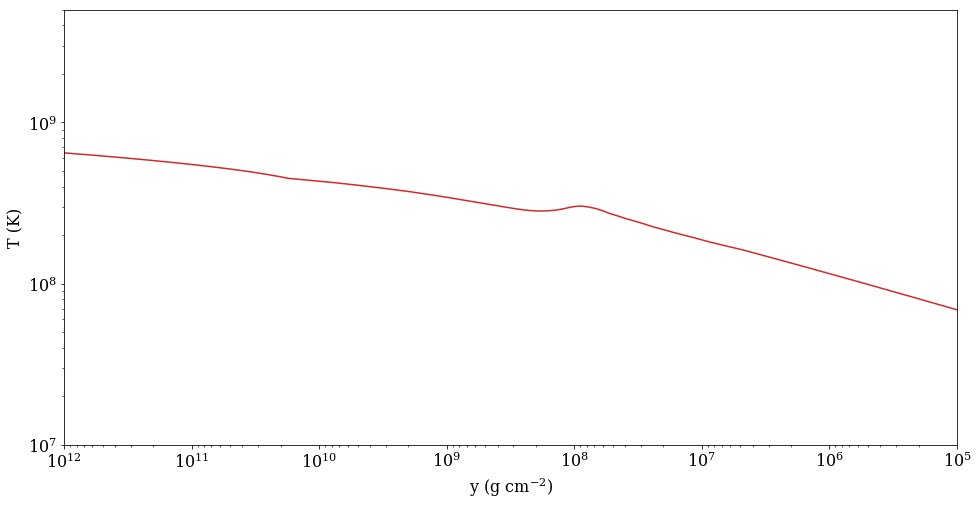

In [126]:
fig, ax = default_fig(xlim=[1e12, 1e5], ylim=[1e7, 5e9],
                     ylabel='T (K)', xlabel=r'y (g cm$^{-2}$)')

ax.plot(k.y[1:-2], k.tn[1:-2], c='C3')

plt.show(block=False)

## Density

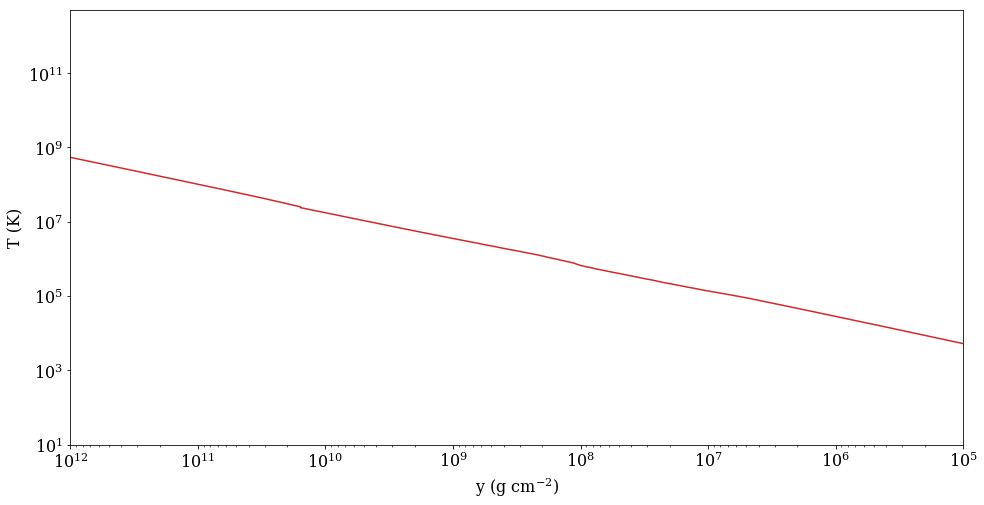

In [123]:
fig, ax = default_fig(xlim=[1e12, 1e5], ylim=[1e1, 5e12],
                     ylabel='T (K)', xlabel=r'y (g cm$^{-2}$)')

ax.plot(k.y[1:-2], k.dn[1:-2], c='C3')

plt.show(block=False)

# Energy generation

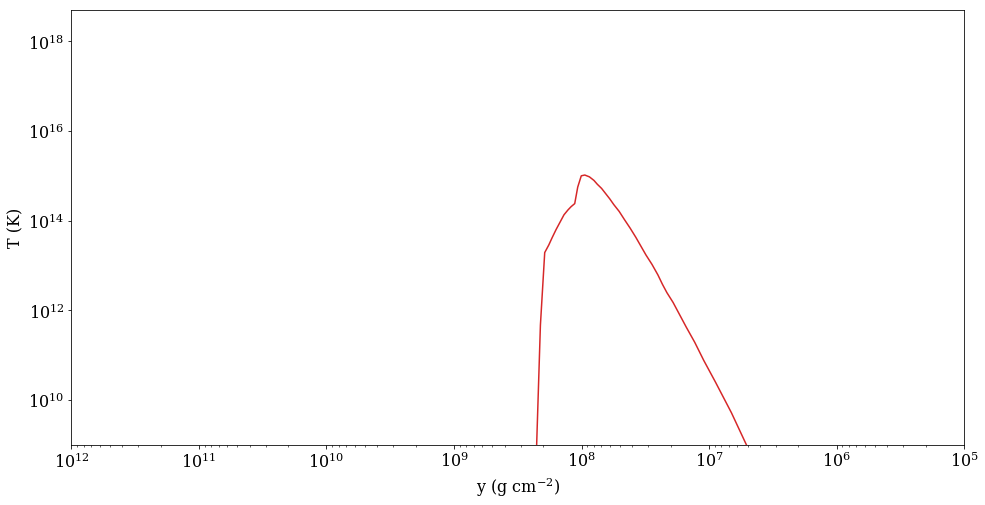

In [124]:
fig, ax = default_fig(xlim=[1e12, 1e5], ylim=[1e9, 5e18],
                     ylabel='T (K)', xlabel=r'y (g cm$^{-2}$)')

ax.plot(k.y[1:-2], k.sn[1:-2], c='C3')

plt.show(block=False)

## approx19 

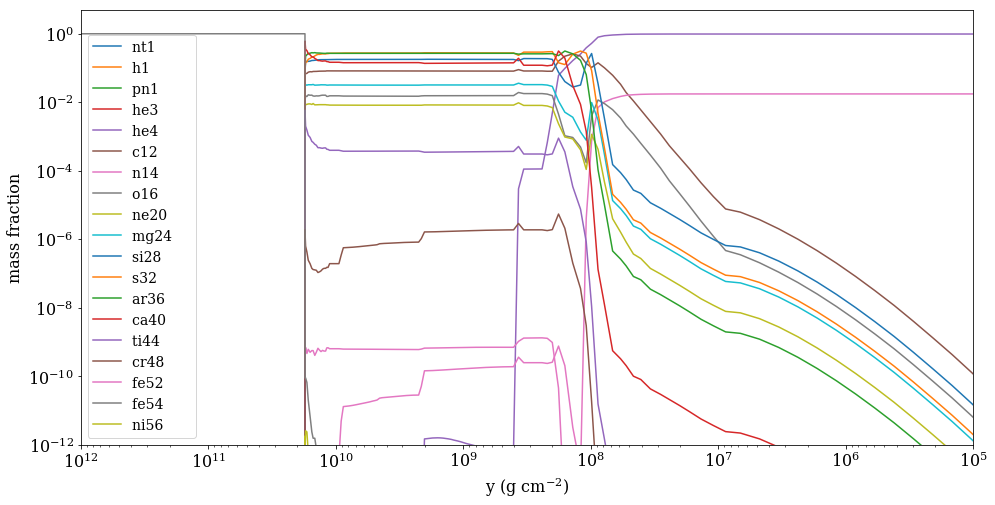

In [131]:
# Plot approx19 isotopes

%matplotlib inline
# %matplotlib

ions = k.ions[:19]
# ions = ['h1', 'he4', 'c12', 'n14', 'o16', 'ni56']

fig, ax = default_fig(xlim=[1e12, 1e5], ylim=[1e-12, 5e0],
                     ylabel='mass fraction', xlabel=r'y (g cm$^{-2}$)')

for ion in ions:
    ax.plot(k.y[1:], k.abu.ion_abu(ion)[1:], label=ion)

ax.legend(fontsize=14)
plt.show(block=False)